In [4]:
from backtrader.indicators import Indicator, MovAv, RelativeStrengthIndex, Highest, Lowest
class StochasticRSI(Indicator):
    """
    K - The time period to be used in calculating the %K. 3 is the default.
    D - The time period to be used in calculating the %D. 3 is the default.
    RSI Length - The time period to be used in calculating the RSI
    Stochastic Length - The time period to be used in calculating the Stochastic
  
    Formula:
    %K = SMA(100 * (RSI(n) - RSI Lowest Low(n)) / (RSI HighestHigh(n) - RSI LowestLow(n)), smoothK)
    %D = SMA(%K, periodD)
  
    """
    lines = ('fastk', 'fastd',)
  
    params = (
        ('k_period', 3),
        ('d_period', 3),
        ('rsi_period', 14),
        ('stoch_period', 14),
        ('movav', MovAv.Simple),
        ('rsi', RelativeStrengthIndex),
        ('upperband', 80.0),
        ('lowerband', 20.0),
    )
  
    plotlines = dict(percD=dict(_name='%D', ls='--'),
                     percK=dict(_name='%K'))
  
    def _plotlabel(self):
        plabels = [self.p.k_period, self.p.d_period, self.p.rsi_period, self.p.stoch_period]
        plabels += [self.p.movav] * self.p.notdefault('movav')
        return plabels
  
    def _plotinit(self):
        self.plotinfo.plotyhlines = [self.p.upperband, self.p.lowerband]
  
    def __init__(self):
        rsi = bt.ind.RSI(period=self.p.rsi_period)
        rsi_ll = bt.ind.Lowest(rsi, period=self.p.rsi_period)
        rsi_hh = bt.ind.Highest(rsi, period=self.p.rsi_period)
        stochrsi = (rsi - rsi_ll) / (rsi_hh - rsi_ll)

        self.l.fastk = k = self.p.movav(100.0 * stochrsi, period=self.p.k_period)
        self.l.fastd = self.p.movav(k, period=self.p.d_period)

In [16]:
import pandas as pd
from datetime import datetime

# load csv and use row 0 as headers
df = pd.read_csv('./crypto/Binance_BTCUSDT_d.csv', header = 0)

# df = df[:10]
# 1580810400
# 1622851200000
df['unix'] = [x/1000 if x > 10000000000 else x for x in df['unix']]
dt = [datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S') for x in df['unix']]

df.insert(loc=0, column='datetime', value=dt)
df.drop_duplicates(subset='datetime', inplace=True)

# reverse data and save
df=df.iloc[::-1]
df.set_index('datetime', inplace=True)
df.to_csv('./crypto/reversed_BTC_d.csv')

df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
datetime,,,,,,,,,,
2017-08-17 00:00:00,1.502928e+09,2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08,647.860000,2.812379e+06,NaN
2017-08-18 00:00:00,1.503014e+09,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.070000,4.994494e+06,NaN
2017-08-19 00:00:00,1.503101e+09,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.150000,1.508239e+06,NaN
2017-08-20 00:00:00,1.503187e+09,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.540000,1.915636e+06,NaN
2017-08-21 00:00:00,1.503274e+09,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.120000,2.770592e+06,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-06-02 00:00:00,1.622592e+09,2021-06-02 00:00:00,BTC/USDT,36694.85,38225.00,35920.00,37568.68,67587.372495,2.523463e+09,1530915.0
2021-06-03 00:00:00,1.622678e+09,2021-06-03 00:00:00,BTC/USDT,37568.68,39476.00,37170.00,39246.79,75889.106011,2.930945e+09,1949658.0
2021-06-04 00:00:00,1.622765e+09,2021-06-04 00:00:00,BTC/USDT,39246.78,39289.07,35555.15,36829.00,91317.799245,3.379400e+09,1926311.0


In [166]:
from datetime import datetime
import backtrader as bt

# Create a subclass of Strategy to define the indicators and logic

class StochRSI(bt.Strategy):
    # list of parameters which are configurable for the strategy
    lines = ('stochrsi','rsi')

    params = (
        ('macd1', 7),
        ('macd2', 21),
        ('macdsig', 5),
        
        ('stoch_k_period', 3),
        ('stoch_d_period', 3),
        ('stoch_rsi_period', 14),
        ('stoch_period', 14),
        ('stoch_upperband', 80.0),
        ('stoch_lowerband', 20.0),
        
        ('rsi_upperband', 60.0),
        ('rsi_lowerband', 40.0),
        
        ('atrperiod', 14),  # ATR Period (standard)
        ('atrdist', 10),   # ATR distance for stop price

        ('size', 0.3),
        ('debug', False),
    )

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.orders = []
        self.buyprice = None
        self.buycomm = None
        
        self.macd = bt.indicators.MACD(self.data,
                               period_me1=self.p.macd1,
                               period_me2=self.p.macd2,
                               period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        
        self.atr = bt.indicators.ATR(self.data, period=self.p.atrperiod)

#         self.rsi = bt.ind.RSI(period=self.p.stoch_rsi_period)
        
        self.stochrsi = StochasticRSI(k_period=self.p.stoch_k_period,
                                   d_period=self.p.stoch_d_period,
                                   rsi_period=self.p.stoch_rsi_period,
                                   stoch_period=self.p.stoch_period,
                                   upperband=self.p.stoch_upperband,
                                   lowerband=self.p.stoch_lowerband)
        
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        hh = self.datas[0].datetime.time()
        print('%s %s, %s' % (dt.isoformat(), hh, txt))

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        close = self.dataclose[0]
        
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
                
#                 stop_price = order.executed.price - self.p.atrdist * self.atr[0]
#                 print("stop loss: ", stop_price)
#                 self.sell(exectype=bt.Order.Stop, price=stop_price, parent=order)
                
                self.log_trade()
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))
                
#                 stop_price = order.executed.price + self.p.atrdist * self.atr[0]
#                 print("stop loss: ", stop_price)
#                 self.buy(exectype=bt.Order.Stop, price=stop_price, parent=order)
                
                self.log_trade()

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
            self.log_trade()

        # Write down: no pending order
        self.orders = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))
        print("")
    
    def cancel_all_orders(self):
        for o in self.orders:
            self.cancel(o)
            
    def log_trade(self):
        close = self.dataclose[0]
        previousStochRSI = self.stochrsi.l.fastk[-1]
        currentStochRSI = self.stochrsi.l.fastk[0]
        self.log('Close, %.2f' % close)
        print("ATR: ", self.atr[0])
        print("mcross: ", self.mcross[0])
        print('previous stoch RSI:', self.stochrsi[-1])
        print('current stoch RSI:', self.stochrsi[0])
        print('fastk: ', currentStochRSI)
        print('fastd: ', self.stochrsi.l.fastd[0])
        print("")

    def next(self):        
        close = self.dataclose[0]

        previousStochRSI = self.stochrsi.l.fastk[-1]
        currentStochRSI = self.stochrsi.l.fastk[0]
        
        should_buy = (
            self.mcross[0] > 0.0 and
#             self.rsi[-1] < self.p.rsi_lowerband and self.rsi[0] >= self.p.rsi_lowerband and
#             self.stochrsi.l.fastk[-4] < self.p.stoch_lowerband and 
            self.stochrsi.l.fastk[-3] < self.p.stoch_lowerband and 
            self.stochrsi.l.fastk[-2] < self.p.stoch_lowerband and 
            self.stochrsi.l.fastk[-1] < self.p.stoch_lowerband and 
            self.stochrsi.l.fastk[0] >= self.p.stoch_lowerband
        )
        
        should_sell = (
            self.mcross[0] < 0.0 and
#             self.rsi[-1] > self.p.rsi_upperband and self.rsi[0] <= self.p.rsi_upperband and
#             self.stochrsi.l.fastk[-4] > self.p.stoch_upperband and 
            self.stochrsi.l.fastk[-3] > self.p.stoch_upperband and 
            self.stochrsi.l.fastk[-2] > self.p.stoch_upperband and 
            self.stochrsi.l.fastk[-1] > self.p.stoch_upperband and 
            self.stochrsi.l.fastk[0] <= self.p.stoch_upperband
        )
        
        reversal_sensitivity = 18
        
        should_stop_loss = True
        should_reverse = True
        should_detect_reversal = True
        
        # Need to sell
        if self.position.size > 0:
            if should_detect_reversal:
                if currentStochRSI > 50 and currentStochRSI < self.p.stoch_upperband:
                    # If fast crosses slow downwards, trend reversal, sell
                    if (self.stochrsi.l.fastk[-1] > self.stochrsi.l.fastd[-1] and 
                        (self.stochrsi.l.fastk[0] - self.stochrsi.l.fastd[0]) < -reversal_sensitivity):

                        self.close()
                        self.log('REVERSAL SELL CLOSE, %.2f' % self.dataclose[0])

                        if should_reverse:
                            if should_stop_loss:
#                                 stop_price = close + self.p.atrdist * self.atr[0]
#                                 self.sell_bracket(size=self.p.size, stopprice=stop_price) 
        
                                sell_order = self.sell(size=self.p.size, transmit=False)
                                stop_price = close + self.p.atrdist * self.atr[0]
                                print("stop loss: ", stop_price)
                                self.buy(exectype=bt.Order.Stop, price=stop_price, parent=sell_order)
                    
                            else:
                                sell_order = self.sell(size=self.p.size)
            
            if should_sell:
                self.close()

                self.log('REVERSAL SELL CREATE, %.2f' % self.dataclose[0])
                
                if should_stop_loss:
#                     stop_loss = close + self.p.atrdist * self.atr[0]
#                     self.sell_bracket(size=self.p.size, stopprice=stop_loss)   
                    
                    sell_order = self.sell(size=self.p.size, transmit=False)
                    stop_price = close + self.p.atrdist * self.atr[0]
                    print("stop loss: ", stop_price)
                    self.buy(exectype=bt.Order.Stop, price=stop_price, parent=sell_order)
                else:
                    sell_order = self.sell(size=self.p.size)
               
               
        # Need to buy
        if self.position.size < 0:
            if should_detect_reversal:
                if currentStochRSI > self.p.stoch_lowerband and currentStochRSI < 50:
                    # If fast crosses slow upwards, trend reversal, buy
                    if (self.stochrsi.l.fastk[-1] < self.stochrsi.l.fastd[-1] and 
                        (self.stochrsi.l.fastk[0] - self.stochrsi.l.fastd[0]) > reversal_sensitivity):

                        self.close()
                        self.log('REVERSAL BUY CLOSE, %.2f' % self.dataclose[0])

                        if should_reverse:
                            if should_stop_loss:                
#                                 stop_loss = close - self.p.atrdist * self.atr[0]
#                                 self.buy_bracket(size=self.p.size, stopprice=stop_loss)

                                buy_order = self.buy(size=self.p.size, transmit=False)
                                stop_price = close - self.p.atrdist * self.atr[0]
                                print("stop loss: ", stop_price)
                                self.sell(exectype=bt.Order.Stop, price=stop_price, parent=buy_order)
                            else:
                                buy_order = self.buy(size=self.p.size)
                    
            if should_buy:
                self.close()
                self.log('REVERSAL BUY CREATE, %.2f' % self.dataclose[0])
                
                if should_stop_loss:                
#                     stop_loss = close - self.p.atrdist * self.atr[0]
#                     self.buy_bracket(size=self.p.size, stopprice=stop_loss)
                    
                    buy_order = self.buy(size=self.p.size, transmit=False)
                    stop_price = close - self.p.atrdist * self.atr[0]
                    print("stop loss: ", stop_price)
                    self.sell(exectype=bt.Order.Stop, price=stop_price, parent=buy_order)
                else:
                    buy_order = self.buy(size=self.p.size)

           
                
        if self.position.size == 0:
            if should_buy:
                self.close()
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                
                if should_stop_loss:
#                     stop_loss = close - self.p.atrdist * self.atr[0]
#                     self.buy_bracket(size=self.p.size, stopprice=stop_loss)

                    buy_order = self.buy(size=self.p.size, transmit=False)
                    stop_price = close - self.p.atrdist * self.atr[0]
                    print("stop loss: ", stop_price)
                    self.sell(exectype=bt.Order.Stop, price=stop_price, parent=buy_order)
                else:
                    buy_order = self.buy(size=self.p.size)
            

            if should_sell:
                self.close()
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                
                if should_stop_loss:
#                     stop_loss = close + self.p.atrdist * self.atr[0]
#                     self.sell_bracket(size=self.p.size, stopprice=stop_loss)
                    
                    sell_order = self.sell(size=self.p.size, transmit=False)
                    stop_price = close + self.p.atrdist * self.atr[0]
                    print("stop loss: ", stop_price)
                    self.buy(exectype=bt.Order.Stop, price=stop_price, parent=sell_order)
                else:
                    sell_order = self.sell(size=self.p.size)
                

                

if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.addstrategy(StochRSI)
    cerebro.broker.setcommission(commission=0.001)
#     cerebro.broker.set_coo(True)

#     data = bt.feeds.YahooFinanceCSVData(dataname='./daily/FB.csv')
#     datapath = './daily/TSLA.csv'

    # Create a Data Feed

#     datapath = './crypto/reversed_BTC_d.csv'
    datapath = './crypto/reversed_BTC_1H.csv'
    
    data = bt.feeds.GenericCSVData(
        dataname=datapath,
        fromdate=datetime(2018,2,1),
        todate=datetime(2021,6,1),
        timeframe=bt.TimeFrame.Minutes,
#         timeframe=bt.TimeFrame.Days,
        nullvalue=0.0,
        datetime=0,
        open=4,
        high=5,
        low=6,
        close=7,
        volume=8,
        compression=60,
        headers=True,
    )

    cerebro.adddata(data)
    cerebro.broker.setcash(100000.0)
    cerebro.addobserver(bt.observers.Value)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
#     cerebro.plot()
    


Starting Portfolio Value: 100000.00
2018-02-03 06:00:00, BUY CREATE, 8715.00
stop loss:  5752.172632792999
2018-02-03 07:00:00, BUY EXECUTED, Price: 8715.00, Cost: 2614.50, Comm 2.61
2018-02-03 07:00:00, Close, 8708.82
ATR:  286.3503983835072
mcross:  0.0
previous stoch RSI: 49.89381738095434
current stoch RSI: 73.07671581184648
fastk:  73.07671581184648
fastd:  47.18690623073286

2018-02-06 01:00:00, REVERSAL SELL CREATE, 6446.17
stop loss:  9988.698448573192
2018-02-06 02:00:00, SELL EXECUTED, Price: 6446.17, Cost: 2614.50, Comm 1.93
2018-02-06 02:00:00, Close, 6373.58
ATR:  351.88835593893924
mcross:  0.0
previous stoch RSI: 73.67867365182009
current stoch RSI: 59.53756611741583
fastk:  59.53756611741583
fastd:  71.5211525683993

2018-02-06 02:00:00, SELL EXECUTED, Price: 6446.17, Cost: -1933.85, Comm 1.93
2018-02-06 02:00:00, Close, 6373.58
ATR:  351.88835593893924
mcross:  0.0
previous stoch RSI: 73.67867365182009
current stoch RSI: 59.53756611741583
fastk:  59.53756611741583
fast

2018-04-13 07:00:00, BUY EXECUTED, Price: 8139.12, Cost: 3600.31, Comm 8.14
2018-04-13 07:00:00, Close, 8093.01
ATR:  144.3617989530211
mcross:  0.0
previous stoch RSI: 3.595245169595311
current stoch RSI: 22.360512037826506
fastk:  22.360512037826506
fastd:  8.651919069140606

2018-04-13 07:00:00, OPERATION PROFIT, GROSS -344.66, NET -349.20

2018-04-15 07:00:00, REVERSAL SELL CREATE, 8074.99
stop loss:  8930.065475013926
2018-04-15 08:00:00, SELL EXECUTED, Price: 8074.99, Cost: 5697.38, Comm 5.65
2018-04-15 08:00:00, Close, 8130.00
ATR:  85.24986553700747
mcross:  0.0
previous stoch RSI: 70.82628726208556
current stoch RSI: 66.51344301050882
fastk:  66.51344301050882
fastd:  76.33694001026198

2018-04-15 08:00:00, SELL EXECUTED, Price: 8074.99, Cost: -2422.50, Comm 2.42
2018-04-15 08:00:00, Close, 8130.00
ATR:  85.24986553700747
mcross:  0.0
previous stoch RSI: 70.82628726208556
current stoch RSI: 66.51344301050882
fastk:  66.51344301050882
fastd:  76.33694001026198

2018-04-15 08:00

2018-05-29 22:00:00, REVERSAL SELL CREATE, 7418.34
stop loss:  8164.781416275853
2018-05-29 23:00:00, SELL EXECUTED, Price: 7418.34, Cost: 2251.41, Comm 2.23
2018-05-29 23:00:00, Close, 7461.29
ATR:  74.16741722561483
mcross:  0.0
previous stoch RSI: 69.70471144913192
current stoch RSI: 55.779325128699575
fastk:  55.779325128699575
fastd:  69.00861560596502

2018-05-29 23:00:00, SELL EXECUTED, Price: 7418.34, Cost: -2225.50, Comm 2.23
2018-05-29 23:00:00, Close, 7461.29
ATR:  74.16741722561483
mcross:  0.0
previous stoch RSI: 69.70471144913192
current stoch RSI: 55.779325128699575
fastk:  55.779325128699575
fastd:  69.00861560596502

2018-05-29 23:00:00, OPERATION PROFIT, GROSS -25.91, NET -30.39

2018-06-13 09:00:00, SELL EXECUTED, Price: 6392.28, Cost: -6392.28, Comm 6.39
2018-06-13 09:00:00, Close, 6358.67
ATR:  73.58096983020091
mcross:  -1.0
previous stoch RSI: 77.93379538793577
current stoch RSI: 45.98446045433271
fastk:  45.98446045433271
fastd:  69.83808917417139

2018-06-24 11

2018-09-03 22:00:00, REVERSAL SELL CREATE, 7260.35
stop loss:  7704.158829231796
2018-09-03 23:00:00, SELL EXECUTED, Price: 7260.35, Cost: 5056.49, Comm 5.08
2018-09-03 23:00:00, Close, 7263.02
ATR:  45.00439128580952
mcross:  0.0
previous stoch RSI: 65.71492793907345
current stoch RSI: 43.29425121731928
fastk:  43.29425121731928
fastd:  67.62853992542439

2018-09-03 23:00:00, SELL EXECUTED, Price: 7260.35, Cost: -2178.11, Comm 2.18
2018-09-03 23:00:00, Close, 7263.02
ATR:  45.00439128580952
mcross:  0.0
previous stoch RSI: 65.71492793907345
current stoch RSI: 43.29425121731928
fastk:  43.29425121731928
fastd:  67.62853992542439

2018-09-03 23:00:00, OPERATION PROFIT, GROSS 25.76, NET 15.62

2018-09-06 07:00:00, REVERSAL BUY CREATE, 6405.88
stop loss:  5474.413846086962
2018-09-06 08:00:00, BUY EXECUTED, Price: 6405.88, Cost: -2178.11, Comm 1.92
2018-09-06 08:00:00, Close, 6433.97
ATR:  91.56542857763927
mcross:  0.0
previous stoch RSI: 20.763550267593537
current stoch RSI: 31.16256565

2018-11-14 15:00:00, SELL EXECUTED, Price: 6267.19, Cost: -2456.28, Comm 6.27
2018-11-14 15:00:00, Close, 6232.83
ATR:  35.84284466394245
mcross:  0.0
previous stoch RSI: 10.88087058463421
current stoch RSI: 5.20291584678561
fastk:  5.20291584678561
fastd:  11.566729099987654

2018-11-14 15:00:00, OPERATION PROFIT, GROSS -50.59, NET -54.40

2018-11-14 16:00:00, SELL EXECUTED, Price: 5934.38, Cost: -5934.38, Comm 5.93
2018-11-14 16:00:00, Close, 5965.11
ATR:  65.02121290223228
mcross:  0.0
previous stoch RSI: 5.20291584678561
current stoch RSI: 0.0
fastk:  0.0
fastd:  5.361262143806606

2018-11-14 16:00:00, SELL EXECUTED, Price: 6000.63, Cost: -6000.63, Comm 6.00
2018-11-14 16:00:00, Close, 5965.11
ATR:  65.02121290223228
mcross:  0.0
previous stoch RSI: 5.20291584678561
current stoch RSI: 0.0
fastk:  0.0
fastd:  5.361262143806606

2018-11-14 16:00:00, SELL EXECUTED, Price: 6124.46, Cost: -6124.46, Comm 6.12
2018-11-14 16:00:00, Close, 5965.11
ATR:  65.02121290223228
mcross:  0.0
previo

2018-12-24 10:00:00, REVERSAL SELL CREATE, 4081.71
stop loss:  4661.969443961558
2018-12-24 11:00:00, SELL EXECUTED, Price: 4081.71, Cost: 2759.30, Comm 2.86
2018-12-24 11:00:00, Close, 4105.96
ATR:  56.952662653573235
mcross:  0.0
previous stoch RSI: 64.68335283732252
current stoch RSI: 46.76495043369086
fastk:  46.76495043369086
fastd:  65.6482323761008

2018-12-24 11:00:00, SELL EXECUTED, Price: 4081.71, Cost: -1224.51, Comm 1.22
2018-12-24 11:00:00, Close, 4105.96
ATR:  56.952662653573235
mcross:  0.0
previous stoch RSI: 64.68335283732252
current stoch RSI: 46.76495043369086
fastk:  46.76495043369086
fastd:  65.6482323761008

2018-12-24 11:00:00, OPERATION PROFIT, GROSS 97.90, NET 92.28

2018-12-29 21:00:00, REVERSAL BUY CREATE, 3859.59
stop loss:  3449.93944903757
2018-12-29 22:00:00, BUY EXECUTED, Price: 3859.59, Cost: -1224.51, Comm 1.16
2018-12-29 22:00:00, Close, 3846.82
ATR:  39.805408303654225
mcross:  0.0
previous stoch RSI: 36.355411301796906
current stoch RSI: 60.11303963

2019-03-11 04:00:00, REVERSAL SELL CLOSE, 3909.00
stop loss:  4078.3633022007834
2019-03-11 04:00:00, REVERSAL SELL CREATE, 3909.00
stop loss:  4078.3633022007834
2019-03-11 05:00:00, SELL EXECUTED, Price: 3909.00, Cost: 1173.31, Comm 1.17
2019-03-11 05:00:00, Close, 3883.02
ATR:  19.476592347215608
mcross:  0.0
previous stoch RSI: 67.66764479534987
current stoch RSI: 36.92697331964886
fastk:  36.92697331964886
fastd:  67.33398541912213

2019-03-11 05:00:00, SELL EXECUTED, Price: 3909.00, Cost: -1172.70, Comm 1.17
2019-03-11 05:00:00, Close, 3883.02
ATR:  19.476592347215608
mcross:  0.0
previous stoch RSI: 67.66764479534987
current stoch RSI: 36.92697331964886
fastk:  36.92697331964886
fastd:  67.33398541912213

2019-03-11 05:00:00, SELL EXECUTED, Price: 3909.00, Cost: -1172.70, Comm 1.17
2019-03-11 05:00:00, Close, 3883.02
ATR:  19.476592347215608
mcross:  0.0
previous stoch RSI: 67.66764479534987
current stoch RSI: 36.92697331964886
fastk:  36.92697331964886
fastd:  67.33398541912213

2019-04-26 20:00:00, REVERSAL BUY CREATE, 5279.11
stop loss:  4740.467333115963
2019-04-26 21:00:00, BUY EXECUTED, Price: 5279.11, Cost: -1552.80, Comm 1.58
2019-04-26 21:00:00, Close, 5295.05
ATR:  52.36967621066057
mcross:  0.0
previous stoch RSI: 31.663082587487853
current stoch RSI: 62.90180810124169
fastk:  62.90180810124169
fastd:  35.04577779708092

2019-04-26 21:00:00, BUY EXECUTED, Price: 5279.11, Cost: 1583.73, Comm 1.58
2019-04-26 21:00:00, Close, 5295.05
ATR:  52.36967621066057
mcross:  0.0
previous stoch RSI: 31.663082587487853
current stoch RSI: 62.90180810124169
fastk:  62.90180810124169
fastd:  35.04577779708092

2019-04-26 21:00:00, OPERATION PROFIT, GROSS -30.93, NET -34.07

2019-04-27 09:00:00, REVERSAL SELL CREATE, 5279.00
stop loss:  5663.887445618953
2019-04-27 10:00:00, SELL EXECUTED, Price: 5279.00, Cost: 1583.73, Comm 1.58
2019-04-27 10:00:00, Close, 5283.47
ATR:  37.07883423604567
mcross:  0.0
previous stoch RSI: 51.82899397736335
current stoch RSI: 22.4624381

2019-06-26 04:00:00, BUY EXECUTED, Price: 12332.95, Cost: 5349.65, Comm 12.33
2019-06-26 04:00:00, Close, 12483.25
ATR:  176.0556421732776
mcross:  0.0
previous stoch RSI: 95.58321586473153
current stoch RSI: 98.06154851585138
fastk:  98.06154851585138
fastd:  96.40932674843815

2019-06-26 04:00:00, BUY EXECUTED, Price: 12407.21, Cost: 12407.21, Comm 12.41
2019-06-26 04:00:00, Close, 12483.25
ATR:  176.0556421732776
mcross:  0.0
previous stoch RSI: 95.58321586473153
current stoch RSI: 98.06154851585138
fastk:  98.06154851585138
fastd:  96.40932674843815

2019-06-26 04:00:00, OPERATION PROFIT, GROSS -416.47, NET -423.45

2019-06-26 05:00:00, BUY EXECUTED, Price: 12668.51, Cost: 12668.51, Comm 12.67
2019-06-26 05:00:00, Close, 12531.41
ATR:  215.45309630375783
mcross:  0.0
previous stoch RSI: 98.06154851585138
current stoch RSI: 100.0
fastk:  100.0
fastd:  97.88158812686096

2019-06-26 05:00:00, BUY EXECUTED, Price: 12572.06, Cost: 12572.06, Comm 12.57
2019-06-26 05:00:00, Close, 12531.4

2019-09-13 01:00:00, REVERSAL SELL CREATE, 10333.26
stop loss:  11031.266616205618
2019-09-13 02:00:00, SELL EXECUTED, Price: 10333.26, Cost: 2881.28, Comm 3.10
2019-09-13 02:00:00, Close, 10364.99
ATR:  69.15061436195025
mcross:  0.0
previous stoch RSI: 54.23531637566247
current stoch RSI: 28.49810004069255
fastk:  28.49810004069255
fastd:  55.55797533876005

2019-09-13 02:00:00, SELL EXECUTED, Price: 10333.26, Cost: -3099.98, Comm 3.10
2019-09-13 02:00:00, Close, 10364.99
ATR:  69.15061436195025
mcross:  0.0
previous stoch RSI: 54.23531637566247
current stoch RSI: 28.49810004069255
fastk:  28.49810004069255
fastd:  55.55797533876005

2019-09-13 02:00:00, OPERATION PROFIT, GROSS 218.70, NET 212.72

2019-09-13 21:00:00, REVERSAL BUY CREATE, 10288.00
stop loss:  9648.724699026441
2019-09-13 22:00:00, BUY EXECUTED, Price: 10288.00, Cost: -3099.98, Comm 3.09
2019-09-13 22:00:00, Close, 10280.42
ATR:  62.537706518973344
mcross:  0.0
previous stoch RSI: 41.578278856567756
current stoch RSI:

2019-11-25 01:00:00, SELL EXECUTED, Price: 6651.41, Cost: -6651.41, Comm 6.65
2019-11-25 01:00:00, Close, 6713.49
ATR:  111.4827682639555
mcross:  0.0
previous stoch RSI: 12.806935776021133
current stoch RSI: 0.0
fastk:  0.0
fastd:  13.022466601610072

2019-11-25 01:00:00, SELL EXECUTED, Price: 6636.43, Cost: -6636.43, Comm 6.64
2019-11-25 01:00:00, Close, 6713.49
ATR:  111.4827682639555
mcross:  0.0
previous stoch RSI: 12.806935776021133
current stoch RSI: 0.0
fastk:  0.0
fastd:  13.022466601610072

2019-11-25 05:00:00, SELL EXECUTED, Price: 6580.61, Cost: -6580.61, Comm 6.58
2019-11-25 05:00:00, Close, 6540.21
ATR:  103.50556498299756
mcross:  0.0
previous stoch RSI: 0.0
current stoch RSI: 0.0
fastk:  0.0
fastd:  0.0

2019-11-27 11:00:00, REVERSAL BUY CLOSE, 7147.74
stop loss:  6197.333949905587
2019-11-27 11:00:00, REVERSAL BUY CREATE, 7147.74
stop loss:  6197.333949905587
2019-11-27 12:00:00, BUY EXECUTED, Price: 7147.74, Cost: -42771.01, Comm 40.74
2019-11-27 12:00:00, Close, 7232

2020-01-06 13:00:00, REVERSAL SELL CREATE, 7528.64
stop loss:  8067.612738018955
2020-01-06 14:00:00, SELL EXECUTED, Price: 7528.64, Cost: 6503.66, Comm 6.78
2020-01-06 14:00:00, Close, 7547.93
ATR:  53.86389710175998
mcross:  0.0
previous stoch RSI: 73.46018373038895
current stoch RSI: 63.18657850855195
fastk:  63.18657850855195
fastd:  74.09613140675147

2020-01-06 14:00:00, SELL EXECUTED, Price: 7528.64, Cost: -2258.59, Comm 2.26
2020-01-06 14:00:00, Close, 7547.93
ATR:  53.86389710175998
mcross:  0.0
previous stoch RSI: 73.46018373038895
current stoch RSI: 63.18657850855195
fastk:  63.18657850855195
fastd:  74.09613140675147

2020-01-06 14:00:00, OPERATION PROFIT, GROSS 272.12, NET 258.84

2020-01-06 23:00:00, BUY EXECUTED, Price: 7770.09, Cost: 3180.47, Comm 7.77
2020-01-06 23:00:00, Close, 7758.00
ATR:  59.67150749489487
mcross:  0.0
previous stoch RSI: 65.577242327877
current stoch RSI: 88.69731786815429
fastk:  88.69731786815429
fastd:  63.8161207598172

2020-01-06 23:00:00, OP

2020-03-05 14:00:00, REVERSAL SELL CREATE, 9023.01
stop loss:  9653.78739554623
2020-03-05 15:00:00, SELL EXECUTED, Price: 9023.01, Cost: 2633.99, Comm 2.71
2020-03-05 15:00:00, Close, 9085.48
ATR:  64.14504387214987
mcross:  0.0
previous stoch RSI: 57.06093372596424
current stoch RSI: 44.14442207908352
fastk:  44.14442207908352
fastd:  62.39939351947277

2020-03-05 15:00:00, SELL EXECUTED, Price: 9023.01, Cost: -2706.90, Comm 2.71
2020-03-05 15:00:00, Close, 9085.48
ATR:  64.14504387214987
mcross:  0.0
previous stoch RSI: 57.06093372596424
current stoch RSI: 44.14442207908352
fastk:  44.14442207908352
fastd:  62.39939351947277

2020-03-05 15:00:00, OPERATION PROFIT, GROSS 72.91, NET 67.57

2020-03-08 16:00:00, SELL EXECUTED, Price: 8167.54, Cost: -8167.54, Comm 8.17
2020-03-08 16:00:00, Close, 8280.11
ATR:  88.64760731684929
mcross:  0.0
previous stoch RSI: 12.357944686750862
current stoch RSI: 0.05609588537029952
fastk:  0.05609588537029952
fastd:  14.268621118190389

2020-03-08 23:0

2020-04-02 17:00:00, BUY EXECUTED, Price: 7038.77, Cost: 3019.41, Comm 7.04
2020-04-02 17:00:00, Close, 7083.96
ATR:  103.35839603699307
mcross:  0.0
previous stoch RSI: 100.0
current stoch RSI: 100.0
fastk:  100.0
fastd:  88.8888888888889

2020-04-02 17:00:00, OPERATION PROFIT, GROSS -203.90, NET -207.92

2020-04-02 18:00:00, REVERSAL SELL CLOSE, 6788.63
stop loss:  8006.150820343507
2020-04-02 19:00:00, SELL EXECUTED, Price: 6788.63, Cost: 4927.14, Comm 4.75
2020-04-02 19:00:00, Close, 6803.25
ATR:  123.72336188903998
mcross:  -1.0
previous stoch RSI: 66.66666666666667
current stoch RSI: 34.19337607719608
fastk:  34.19337607719608
fastd:  66.95334758128759

2020-04-02 19:00:00, SELL EXECUTED, Price: 6788.63, Cost: -2036.59, Comm 2.04
2020-04-02 19:00:00, Close, 6803.25
ATR:  123.72336188903998
mcross:  -1.0
previous stoch RSI: 66.66666666666667
current stoch RSI: 34.19337607719608
fastk:  34.19337607719608
fastd:  66.95334758128759

2020-04-02 19:00:00, OPERATION PROFIT, GROSS -175.1

2020-04-28 09:00:00, REVERSAL BUY CREATE, 7741.68
stop loss:  7257.035183302625
2020-04-28 10:00:00, BUY EXECUTED, Price: 7741.68, Cost: -2307.00, Comm 2.32
2020-04-28 10:00:00, Close, 7743.36
ATR:  47.759875836184875
mcross:  0.0
previous stoch RSI: 24.889595948684256
current stoch RSI: 37.411974524170255
fastk:  37.411974524170255
fastd:  25.75306986290222

2020-04-28 10:00:00, BUY EXECUTED, Price: 7741.68, Cost: 2322.50, Comm 2.32
2020-04-28 10:00:00, Close, 7743.36
ATR:  47.759875836184875
mcross:  0.0
previous stoch RSI: 24.889595948684256
current stoch RSI: 37.411974524170255
fastk:  37.411974524170255
fastd:  25.75306986290222

2020-04-28 10:00:00, OPERATION PROFIT, GROSS -15.50, NET -20.13

2020-04-29 10:00:00, BUY EXECUTED, Price: 8006.15, Cost: 8006.15, Comm 8.01
2020-04-29 10:00:00, Close, 8108.75
ATR:  61.08184494104779
mcross:  0.0
previous stoch RSI: 98.99684969285636
current stoch RSI: 99.17676368664975
fastk:  99.17676368664975
fastd:  99.05682102412082

2020-04-29 10:0

2020-07-12 07:00:00, REVERSAL SELL CREATE, 9255.92
stop loss:  9536.548321424372
2020-07-12 08:00:00, SELL EXECUTED, Price: 9255.92, Cost: 2796.53, Comm 2.78
2020-07-12 08:00:00, Close, 9254.52
ATR:  27.71548698940606
mcross:  0.0
previous stoch RSI: 73.21998811952643
current stoch RSI: 61.50449334832118
fastk:  61.50449334832118
fastd:  72.64613105961926

2020-07-12 08:00:00, SELL EXECUTED, Price: 9255.92, Cost: -2776.78, Comm 2.78
2020-07-12 08:00:00, Close, 9254.52
ATR:  27.71548698940606
mcross:  0.0
previous stoch RSI: 73.21998811952643
current stoch RSI: 61.50449334832118
fastk:  61.50449334832118
fastd:  72.64613105961926

2020-07-12 08:00:00, OPERATION PROFIT, GROSS -19.76, NET -25.33

2020-07-12 20:00:00, REVERSAL BUY CREATE, 9230.87
stop loss:  8899.456056263623
2020-07-12 21:00:00, BUY EXECUTED, Price: 9230.87, Cost: -2776.78, Comm 2.77
2020-07-12 21:00:00, Close, 9260.60
ATR:  34.51200906123502
mcross:  0.0
previous stoch RSI: 28.339149271993392
current stoch RSI: 56.745384

2020-08-15 00:00:00, REVERSAL BUY CLOSE, 11916.96
stop loss:  11029.547896880244
2020-08-15 01:00:00, BUY EXECUTED, Price: 11917.25, Cost: -3357.22, Comm 3.58
2020-08-15 01:00:00, Close, 11921.77
ATR:  88.56612386112029
mcross:  0.0
previous stoch RSI: 43.113194628656295
current stoch RSI: 67.48947016990307
fastk:  67.48947016990307
fastd:  41.27303547541533

2020-08-15 01:00:00, BUY EXECUTED, Price: 11917.25, Cost: 3575.17, Comm 3.58
2020-08-15 01:00:00, Close, 11921.77
ATR:  88.56612386112029
mcross:  0.0
previous stoch RSI: 43.113194628656295
current stoch RSI: 67.48947016990307
fastk:  67.48947016990307
fastd:  41.27303547541533

2020-08-15 01:00:00, OPERATION PROFIT, GROSS -217.95, NET -224.89

2020-08-17 15:00:00, BUY EXECUTED, Price: 12302.35, Cost: 12302.35, Comm 12.30
2020-08-17 15:00:00, Close, 12421.55
ATR:  107.30131281989125
mcross:  0.0
previous stoch RSI: 90.10885182523317
current stoch RSI: 100.0
fastk:  100.0
fastd:  93.4059012168221

2020-08-20 21:00:00, REVERSAL SELL

previous stoch RSI: 84.61053060706742
current stoch RSI: 93.85502882022449
fastk:  93.85502882022449
fastd:  82.00584006028

2020-10-21 14:00:00, BUY EXECUTED, Price: 12761.05, Cost: 12761.05, Comm 12.76
2020-10-21 14:00:00, Close, 12730.01
ATR:  123.63165368996198
mcross:  0.0
previous stoch RSI: 84.61053060706742
current stoch RSI: 93.85502882022449
fastk:  93.85502882022449
fastd:  82.00584006028

2020-10-21 14:00:00, OPERATION PROFIT, GROSS -183.53, NET -190.86

2020-10-21 22:00:00, BUY EXECUTED, Price: 12998.55, Cost: 12998.55, Comm 13.00
2020-10-21 22:00:00, Close, 13198.50
ATR:  154.2637010170205
mcross:  0.0
previous stoch RSI: 52.3378053987741
current stoch RSI: 69.12519738239162
fastk:  69.12519738239162
fastd:  58.66364814770373

2020-10-22 22:00:00, REVERSAL SELL CLOSE, 13009.48
stop loss:  14417.433166477465
2020-10-22 22:00:00, REVERSAL SELL CREATE, 13009.48
stop loss:  14417.433166477465
2020-10-22 23:00:00, SELL EXECUTED, Price: 13009.48, Cost: 34526.53, Comm 35.13
2020

2020-11-23 00:00:00, REVERSAL SELL CREATE, 18136.30
stop loss:  20332.69036947274
2020-11-23 01:00:00, SELL EXECUTED, Price: 18136.31, Cost: 56985.70, Comm 59.85
2020-11-23 01:00:00, Close, 18209.51
ATR:  223.45624859389744
mcross:  0.0
previous stoch RSI: 69.8338309733811
current stoch RSI: 43.8917561675839
fastk:  43.8917561675839
fastd:  67.81036947886999

2020-11-23 01:00:00, SELL EXECUTED, Price: 18136.31, Cost: -5440.89, Comm 5.44
2020-11-23 01:00:00, Close, 18209.51
ATR:  223.45624859389744
mcross:  0.0
previous stoch RSI: 69.8338309733811
current stoch RSI: 43.8917561675839
fastk:  43.8917561675839
fastd:  67.81036947886999

2020-11-23 01:00:00, OPERATION PROFIT, GROSS 2864.12, NET 2747.29

2020-12-02 06:00:00, REVERSAL BUY CREATE, 18926.66
stop loss:  15505.973615099485
2020-12-02 07:00:00, BUY EXECUTED, Price: 18924.13, Cost: -5440.89, Comm 5.68
2020-12-02 07:00:00, Close, 19124.48
ATR:  339.2065928836192
mcross:  0.0
previous stoch RSI: 44.27713066703644
current stoch RSI: 7

2021-01-29 08:00:00, REVERSAL BUY CLOSE, 36240.24
stop loss:  27085.47334355553
2021-01-29 08:00:00, REVERSAL BUY CREATE, 36240.24
stop loss:  27085.47334355553
2021-01-29 09:00:00, BUY EXECUTED, Price: 36223.22, Cost: -11034.65, Comm 10.87
2021-01-29 09:00:00, Close, 36877.16
ATR:  1092.8119038127004
mcross:  0.0
previous stoch RSI: 30.68641445462887
current stoch RSI: 63.7470617473781
fastk:  63.7470617473781
fastd:  31.47782540066899

2021-01-29 09:00:00, BUY EXECUTED, Price: 36223.22, Cost: 10866.97, Comm 10.87
2021-01-29 09:00:00, Close, 36877.16
ATR:  1092.8119038127004
mcross:  0.0
previous stoch RSI: 30.68641445462887
current stoch RSI: 63.7470617473781
fastk:  63.7470617473781
fastd:  31.47782540066899

2021-01-29 09:00:00, BUY EXECUTED, Price: 36223.22, Cost: 10866.97, Comm 10.87
2021-01-29 09:00:00, Close, 36877.16
ATR:  1092.8119038127004
mcross:  0.0
previous stoch RSI: 30.68641445462887
current stoch RSI: 63.7470617473781
fastk:  63.7470617473781
fastd:  31.47782540066899

2021-03-23 20:00:00, REVERSAL SELL CREATE, 54452.60
stop loss:  61426.346136182096
2021-03-23 21:00:00, SELL EXECUTED, Price: 54453.30, Cost: 17860.10, Comm 16.34
2021-03-23 21:00:00, Close, 54646.59
ATR:  688.2378555026235
mcross:  0.0
previous stoch RSI: 59.44485438910531
current stoch RSI: 40.77027633052371
fastk:  40.77027633052371
fastd:  61.87946057364678

2021-03-23 21:00:00, SELL EXECUTED, Price: 54453.30, Cost: -16335.99, Comm 16.34
2021-03-23 21:00:00, Close, 54646.59
ATR:  688.2378555026235
mcross:  0.0
previous stoch RSI: 59.44485438910531
current stoch RSI: 40.77027633052371
fastk:  40.77027633052371
fastd:  61.87946057364678

2021-03-23 21:00:00, OPERATION PROFIT, GROSS -1524.11, NET -1558.31

2021-03-24 22:00:00, SELL EXECUTED, Price: 52111.20, Cost: -52111.20, Comm 52.11
2021-03-24 22:00:00, Close, 52534.03
ATR:  869.0636889250416
mcross:  0.0
previous stoch RSI: 0.0
current stoch RSI: 0.0
fastk:  0.0
fastd:  2.414169899184338

2021-03-25 05:00:00, REVERSAL BUY CREATE, 

2021-05-13 00:00:00, SELL EXECUTED, Price: 46298.37, Cost: -46298.37, Comm 46.30
2021-05-13 00:00:00, Close, 49666.99
ATR:  1425.9596866317625
mcross:  0.0
previous stoch RSI: 8.768020075598619
current stoch RSI: 0.34231264867833305
fastk:  0.34231264867833305
fastd:  7.916595784435287

2021-05-13 00:00:00, SELL EXECUTED, Price: 47893.98, Cost: -47893.98, Comm 47.89
2021-05-13 00:00:00, Close, 49666.99
ATR:  1425.9596866317625
mcross:  0.0
previous stoch RSI: 8.768020075598619
current stoch RSI: 0.34231264867833305
fastk:  0.34231264867833305
fastd:  7.916595784435287

2021-05-15 12:00:00, REVERSAL BUY CREATE, 49167.21
stop loss:  41306.44923127142
2021-05-15 13:00:00, BUY EXECUTED, Price: 49167.22, Cost: -111244.88, Comm 113.08
2021-05-15 13:00:00, Close, 48995.02
ATR:  788.0427856676536
mcross:  0.0
previous stoch RSI: 31.79191340681582
current stoch RSI: 45.66335423458022
fastk:  45.66335423458022
fastd:  32.04789065089102

2021-05-15 13:00:00, BUY EXECUTED, Price: 49167.22, Cost: 1

<IPython.core.display.Javascript object>


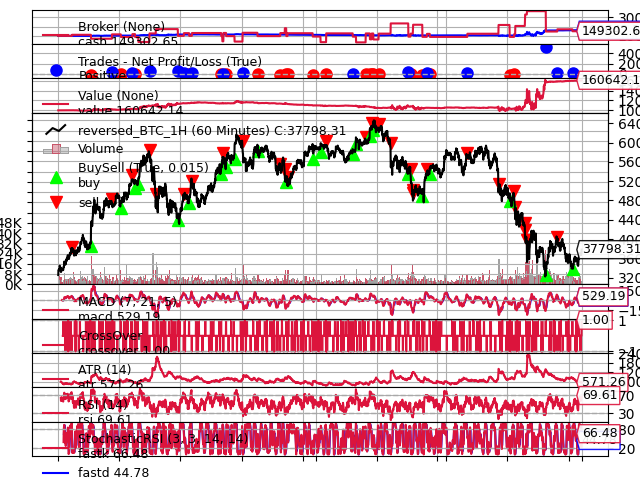

[[<Figure size 640x480 with 10 Axes>]]

In [161]:
cerebro.plot()